# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Domain of dataset selection is "Sports"

# 1. Read the dataset to the python environment.

In [3]:
data=pd.read_csv('understat_per_game2.csv')

In [4]:
data.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5.0,4.0,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10.0,1.0,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13.0,3.0,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6.0,2.0,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23.0,2.0,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


# 2. Do necessary pre-processing steps

In [5]:
#Checking the basic details of the dataset

In [6]:
data.shape

(24580, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        24578 non-null  object 
 1   year          24580 non-null  int64  
 2   h_a           24579 non-null  object 
 3   xG            24580 non-null  float64
 4   xGA           24580 non-null  float64
 5   npxG          24580 non-null  float64
 6   npxGA         24580 non-null  float64
 7   deep          24512 non-null  float64
 8   deep_allowed  24512 non-null  float64
 9   scored        24580 non-null  int64  
 10  missed        24580 non-null  int64  
 11  xpts          24580 non-null  float64
 12  result        24580 non-null  object 
 13  date          24576 non-null  object 
 14  wins          24580 non-null  int64  
 15  draws         24580 non-null  int64  
 16  loses         24580 non-null  int64  
 17  pts           24580 non-null  int64  
 18  npxGD         24580 non-nu

In [8]:
data.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24512.000000,24512.000000,24580.000000,24580.000000,24580.000000,...,2.458000e+04,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.309694,1.309694,1.193872,1.193872,5.806870,5.806177,1.341009,1.341009,1.378563,...,8.252146e-18,10.904386,239.612327,24.349593,10.904386,239.612327,24.349593,-0.031315,-0.031315,0.004723
std,1.699285,0.841109,0.841109,0.774719,0.774719,4.050534,4.047332,1.244176,1.244176,0.823751,...,1.205702e+00,6.163586,83.998463,7.172098,6.163586,83.998463,7.172098,0.951362,0.951362,1.051608
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.007965e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.943560,-5.943560,-2.965500
25%,2015.000000,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,...,-7.306208e-01,6.962963,179.000000,19.000000,6.962963,179.000000,19.000000,-0.593430,-0.593430,-0.679800
50%,2016.000000,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,...,0.000000e+00,9.500000,231.000000,24.000000,9.500000,231.000000,24.000000,0.092995,0.092995,0.093950
75%,2018.000000,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,...,7.306208e-01,13.095622,290.000000,29.000000,13.095622,290.000000,29.000000,0.588477,0.588477,0.739575
max,2019.000000,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,...,6.007965e+00,152.000000,764.000000,65.000000,152.000000,764.000000,65.000000,5.063130,5.063130,2.940900


In [9]:
data.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep            float64
deep_allowed    float64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

In [10]:
#1.Missing value handling

In [11]:
#Checking for null values
data.isna().sum()

league           2
year             0
h_a              1
xG               0
xGA              0
npxG             0
npxGA            0
deep            68
deep_allowed    68
scored           0
missed           0
xpts             0
result           0
date             4
wins             0
draws            0
loses            0
pts              0
npxGD            0
ppda_coef        0
ppda_att         0
ppda_def         0
oppda_coef       0
oppda_att        0
oppda_def        0
team             4
xG_diff          0
xGA_diff         0
xpts_diff        0
dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'xG'}>,
        <AxesSubplot:title={'center':'xGA'}>,
        <AxesSubplot:title={'center':'npxG'}>,
        <AxesSubplot:title={'center':'npxGA'}>],
       [<AxesSubplot:title={'center':'deep'}>,
        <AxesSubplot:title={'center':'deep_allowed'}>,
        <AxesSubplot:title={'center':'scored'}>,
        <AxesSubplot:title={'center':'missed'}>,
        <AxesSubplot:title={'center':'xpts'}>],
       [<AxesSubplot:title={'center':'wins'}>,
        <AxesSubplot:title={'center':'draws'}>,
        <AxesSubplot:title={'center':'loses'}>,
        <AxesSubplot:title={'center':'pts'}>,
        <AxesSubplot:title={'center':'npxGD'}>],
       [<AxesSubplot:title={'center':'ppda_coef'}>,
        <AxesSubplot:title={'center':'ppda_att'}>,
        <AxesSubplot:title={'center':'ppda_def'}>,
        <AxesSubplot:title={'center':'oppda_coef'}>,
        <AxesSubplot:title={'center':'oppda_att'}>],
       [<AxesSubplot

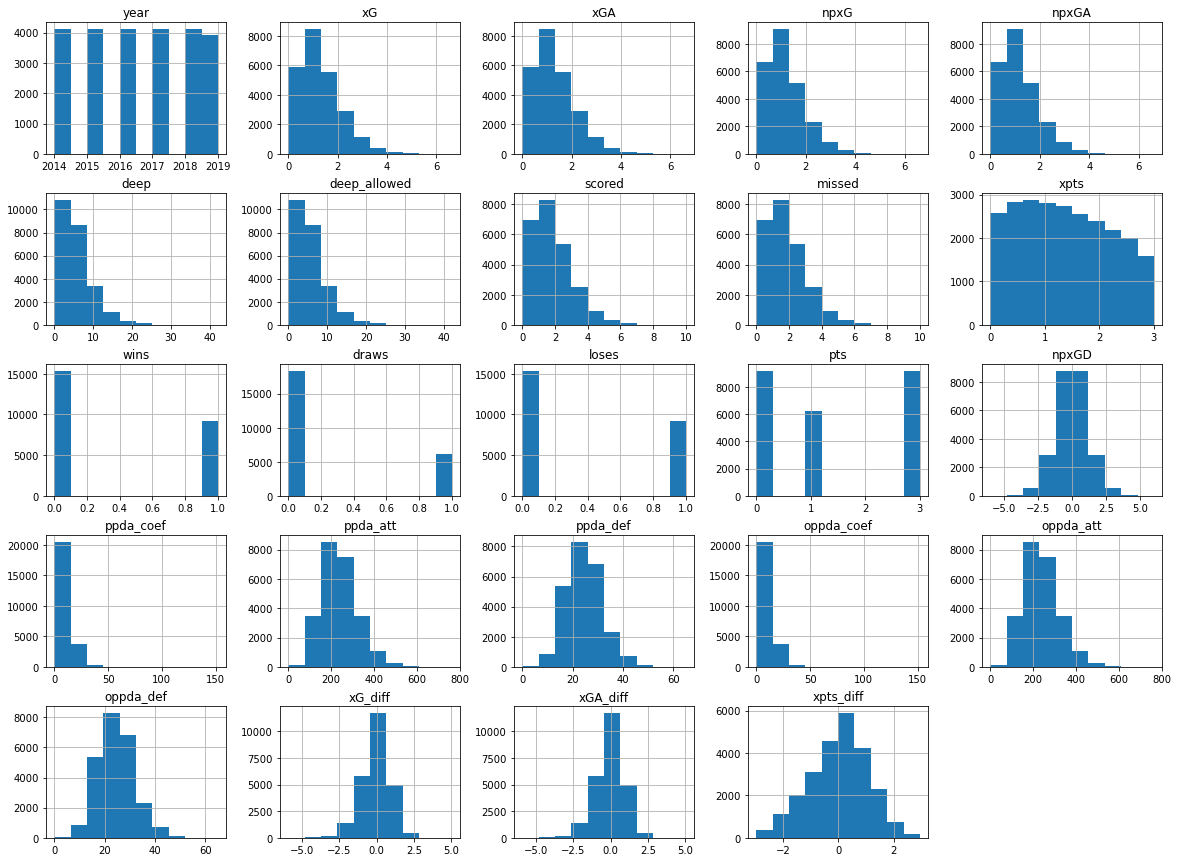

In [12]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))

In [13]:
#filling missing values in 'deep' and deep_allowed column using thieir median since they are skewed

for i in ['deep','deep_allowed', ]:
    data[i]=data[i].fillna(data[i].median())

In [14]:
#filling missing values in 'league','h_a','date','team' column using mode since they are object type
for i in ['league','h_a','date','team']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [15]:
#Checking null values again
data.isna().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64

In [16]:
#2.Outlier detection and handling

In [17]:
data.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x23cda7da160>,
 'caps': [<matplotlib.lines.Line2D at 0x23cda7da7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cda7c8ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cda7daee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cda7e62b0>],
 'means': []}

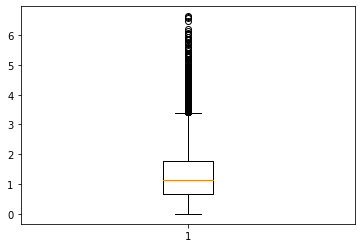

In [18]:
plt.boxplot(data['xG'])

In [19]:
Q1=np.percentile(data['xG'],25,interpolation='midpoint')
Q2=np.percentile(data['xG'],50,interpolation='midpoint')
Q3=np.percentile(data['xG'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)

Q1= 0.6811100000000001
Q2= 1.150595
Q3= 1.76946
IQR= 1.08835
low_lim= -0.9514149999999997
up_lim= 3.401985


In [20]:
outlier=[]
for x in data['xG']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

In [21]:
ind1=data['xG']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x23cda84b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cda858130>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cda84b640>],
 'medians': [<matplotlib.lines.Line2D at 0x23cda858880>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cda858c10>],
 'means': []}

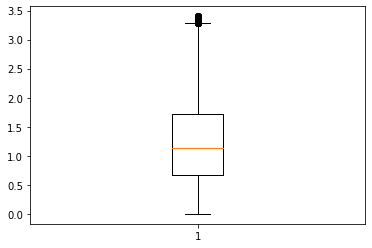

In [22]:
plt.boxplot(data['xG'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cda8bb340>,
 'caps': [<matplotlib.lines.Line2D at 0x23cda8bba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cda8adf70>],
 'medians': [<matplotlib.lines.Line2D at 0x23cda8c61c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cda8c6550>],
 'means': []}

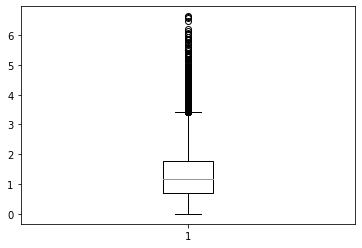

In [23]:
plt.boxplot(data['xGA'])

In [24]:
Q1=np.percentile(data['xGA'],25,interpolation='midpoint')
Q2=np.percentile(data['xGA'],50,interpolation='midpoint')
Q3=np.percentile(data['xGA'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['xGA']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 0.691171
Q2= 1.1627800000000001
Q3= 1.78246
IQR= 1.091289
low_lim= -0.9457625000000001
up_lim= 3.4193935


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdb907730>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdb907e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdb9073a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdb9105b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdb910940>],
 'means': []}

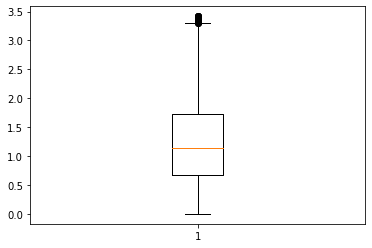

In [25]:
ind1=data['xGA']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['xGA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdb966f10>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdb975670>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdb966b80>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdb975d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdb981160>],
 'means': []}

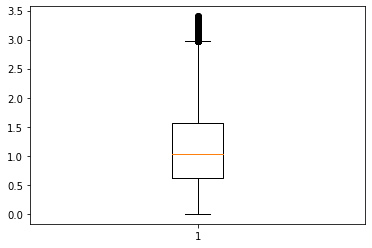

In [26]:
plt.boxplot(data['npxG'])

In [27]:
Q1=np.percentile(data['npxG'],25,interpolation='midpoint')
Q2=np.percentile(data['npxG'],50,interpolation='midpoint')
Q3=np.percentile(data['npxG'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['npxG']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 0.620492
Q2= 1.03163
Q3= 1.55907
IQR= 0.9385779999999999
low_lim= -0.7873749999999999
up_lim= 2.9669369999999997


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbc56220>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbc56940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbc49e50>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbc600a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbc60430>],
 'means': []}

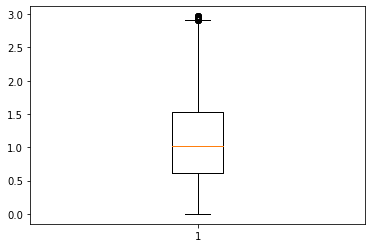

In [28]:
ind1=data['npxG']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['npxG'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbcbe4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbcbebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbcbe130>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbcc9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbcc96d0>],
 'means': []}

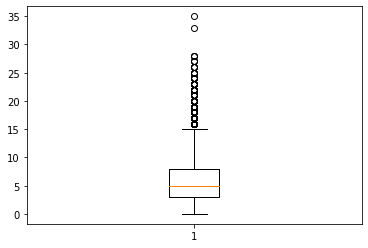

In [29]:
plt.boxplot(data['deep'])

In [30]:
Q1=np.percentile(data['deep'],25,interpolation='midpoint')
Q2=np.percentile(data['deep'],50,interpolation='midpoint')
Q3=np.percentile(data['deep'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['deep']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 3.0
Q2= 5.0
Q3= 8.0
IQR= 5.0
low_lim= -4.5
up_lim= 15.5


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdb9d40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdb9d47f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdb9c5d00>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdb9d4f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdb9e22e0>],
 'means': []}

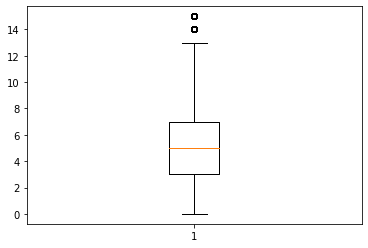

In [31]:
ind1=data['deep']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['deep'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdba39700>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdba39e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdba39370>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdba47580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdba47910>],
 'means': []}

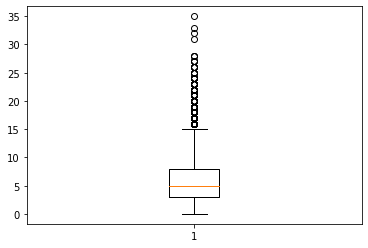

In [32]:
plt.boxplot(data['deep_allowed'])

In [33]:
Q1=np.percentile(data['deep_allowed'],25,interpolation='midpoint')
Q2=np.percentile(data['deep_allowed'],50,interpolation='midpoint')
Q3=np.percentile(data['deep_allowed'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['deep_allowed']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 3.0
Q2= 5.0
Q3= 8.0
IQR= 5.0
low_lim= -4.5
up_lim= 15.5


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbab0280>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbab09a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbaa1eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbabb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbabb490>],
 'means': []}

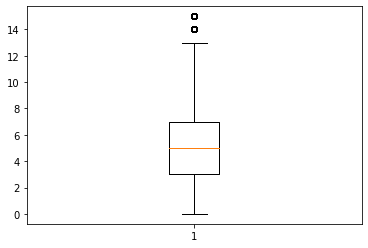

In [34]:
ind1=data['deep_allowed']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['deep_allowed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbb15700>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbb15e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbb15370>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbb23580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbb23910>],
 'means': []}

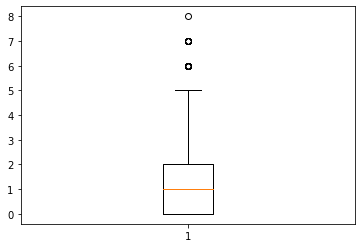

In [35]:
plt.boxplot(data['scored'])

In [36]:
Q1=np.percentile(data['scored'],25,interpolation='midpoint')
Q2=np.percentile(data['scored'],50,interpolation='midpoint')
Q3=np.percentile(data['scored'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['scored']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 0.0
Q2= 1.0
Q3= 2.0
IQR= 2.0
low_lim= -3.0
up_lim= 5.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbb84940>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbb930a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbb845b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbb937c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbb93b50>],
 'means': []}

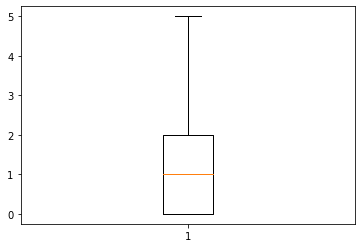

In [37]:
ind1=data['scored']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['scored'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbbee250>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbbee970>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbbdde80>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbbf9100>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbbf9490>],
 'means': []}

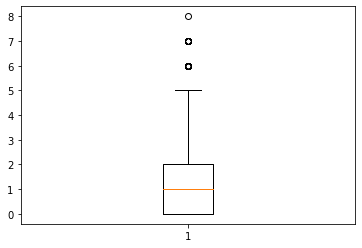

In [38]:
plt.boxplot(data['missed'])

In [39]:
Q1=np.percentile(data['missed'],25,interpolation='midpoint')
Q2=np.percentile(data['missed'],50,interpolation='midpoint')
Q3=np.percentile(data['missed'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['missed']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 0.0
Q2= 1.0
Q3= 2.0
IQR= 2.0
low_lim= -3.0
up_lim= 5.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbdf04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbdf0be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbdf0130>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbdfc340>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbdfc6d0>],
 'means': []}

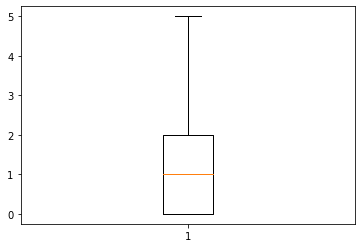

In [40]:
ind1=data['missed']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['missed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbe4ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbe595b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbe4aac0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdbe59cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbe660a0>],
 'means': []}

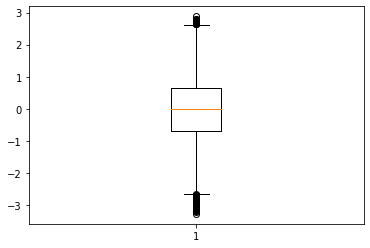

In [41]:
plt.boxplot(data['npxGD'])

In [42]:
Q1=np.percentile(data['npxGD'],25,interpolation='midpoint')
Q2=np.percentile(data['npxGD'],50,interpolation='midpoint')
Q3=np.percentile(data['npxGD'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['npxGD']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= -0.6800999999999999
Q2= -0.0154099999999999
Q3= 0.6424704999999999
IQR= 1.3225704999999999
low_lim= -2.6639557499999995
up_lim= 2.62632625


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbec5430>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbec5b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbec50a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd6e02b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd6e0640>],
 'means': []}

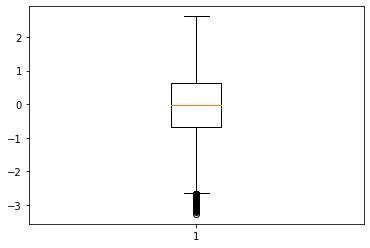

In [43]:
ind1=data['npxGD']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['npxGD'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd72dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd7393a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd72d880>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd739ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd739e50>],
 'means': []}

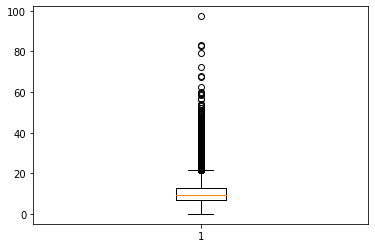

In [44]:
plt.boxplot(data['ppda_coef'])

In [45]:
Q1=np.percentile(data['ppda_coef'],25,interpolation='midpoint')
Q2=np.percentile(data['ppda_coef'],50,interpolation='midpoint')
Q3=np.percentile(data['ppda_coef'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['ppda_coef']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 6.9714052287581705
Q2= 9.47058823529412
Q3= 12.8956442831216
IQR= 5.924239054363429
low_lim= -1.9149533527869735
up_lim= 21.782002864666744


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd78ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd79a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd78ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd79aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd2c2070>],
 'means': []}

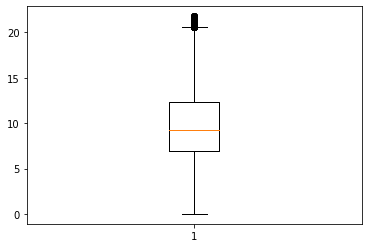

In [46]:
ind1=data['ppda_coef']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['ppda_coef'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd3171c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd3178e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd308df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd323040>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd3233d0>],
 'means': []}

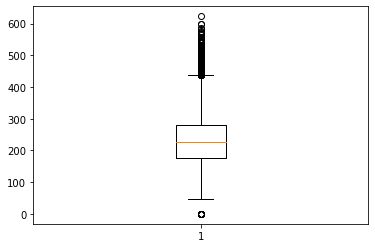

In [47]:
plt.boxplot(data['ppda_att'])

In [48]:
Q1=np.percentile(data['ppda_att'],25,interpolation='midpoint')
Q2=np.percentile(data['ppda_att'],50,interpolation='midpoint')
Q3=np.percentile(data['ppda_att'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['ppda_att']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 177.0
Q2= 226.0
Q3= 281.0
IQR= 104.0
low_lim= 21.0
up_lim= 437.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd37b880>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd37bfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd37b4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd5a9700>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd5a9a90>],
 'means': []}

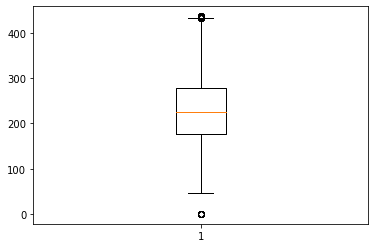

In [49]:
ind1=data['ppda_att']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['ppda_att'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd5f8b80>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd6062e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd5f87f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd606a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd606d90>],
 'means': []}

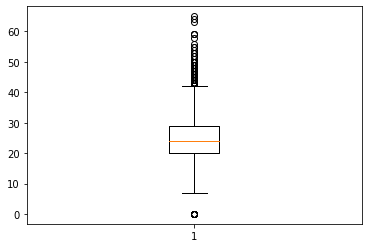

In [50]:
plt.boxplot(data['ppda_def'])

In [51]:
Q1=np.percentile(data['ppda_def'],25,interpolation='midpoint')
Q2=np.percentile(data['ppda_def'],50,interpolation='midpoint')
Q3=np.percentile(data['ppda_def'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['ppda_def']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 20.0
Q2= 24.0
Q3= 29.0
IQR= 9.0
low_lim= 6.5
up_lim= 42.5


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd38f220>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd38f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd380e50>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd3990a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd399430>],
 'means': []}

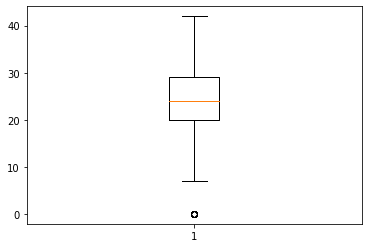

In [52]:
ind1=data['ppda_def']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['ppda_def'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd3ee4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd3eebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd3ee130>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd3fc340>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd3fc6d0>],
 'means': []}

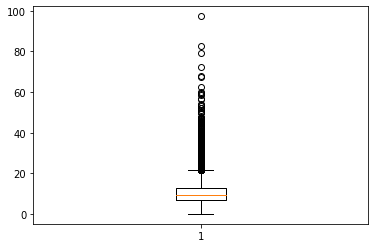

In [53]:
plt.boxplot(data['oppda_coef'])

In [54]:
Q1=np.percentile(data['oppda_coef'],25,interpolation='midpoint')
Q2=np.percentile(data['oppda_coef'],50,interpolation='midpoint')
Q3=np.percentile(data['oppda_coef'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['oppda_coef']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 7.0344827586206895
Q2= 9.517879948914436
Q3= 12.9411764705882
IQR= 5.9066937119675105
low_lim= -1.8255578093305767
up_lim= 21.801217038539466


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd4635b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd463cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd463220>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd46c430>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd46c7c0>],
 'means': []}

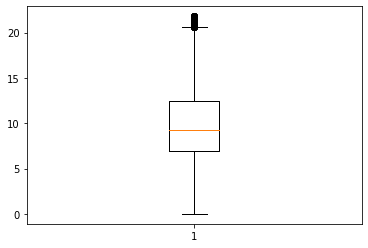

In [55]:
ind1=data['oppda_coef']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['oppda_coef'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd4c0910>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd4cd070>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd4c0550>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd4cd790>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd4cdb20>],
 'means': []}

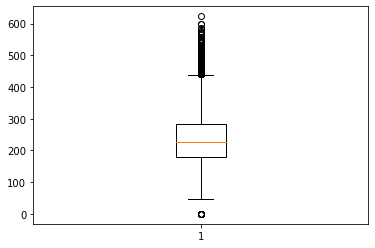

In [56]:
plt.boxplot(data['oppda_att'])

In [57]:
Q1=np.percentile(data['oppda_att'],25,interpolation='midpoint')
Q2=np.percentile(data['oppda_att'],50,interpolation='midpoint')
Q3=np.percentile(data['oppda_att'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['oppda_coef']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 179.0
Q2= 228.0
Q3= 283.0
IQR= 104.0
low_lim= 23.0
up_lim= 439.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd6a0ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd6af640>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd6a0b50>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd6afd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd6be130>],
 'means': []}

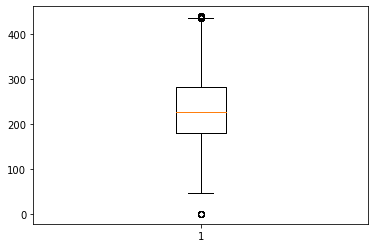

In [58]:
ind1=data['oppda_att']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['oppda_att'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cddb9f2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cddb9f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cddb8fee0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cddbac130>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cddbac4c0>],
 'means': []}

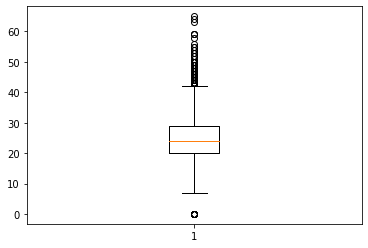

In [59]:
plt.boxplot(data['oppda_def'])

In [60]:
Q1=np.percentile(data['oppda_def'],25,interpolation='midpoint')
Q2=np.percentile(data['oppda_def'],50,interpolation='midpoint')
Q3=np.percentile(data['oppda_def'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['oppda_def']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 20.0
Q2= 24.0
Q3= 29.0
IQR= 9.0
low_lim= 6.5
up_lim= 42.5


{'whiskers': [<matplotlib.lines.Line2D at 0x23cddbec8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23cddbecfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cddbec520>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd548730>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd548ac0>],
 'means': []}

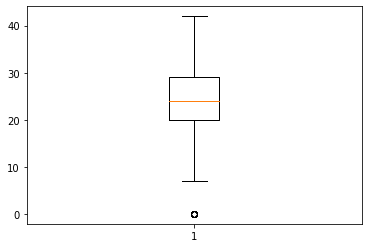

In [61]:
ind1=data['oppda_def']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['oppda_def'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd51ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd5292b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd51a790>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd5299d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd529d60>],
 'means': []}

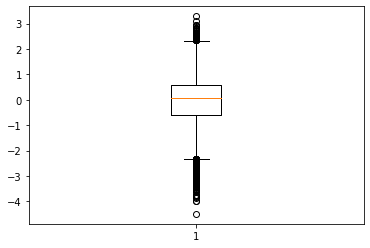

In [62]:
plt.boxplot(data['xG_diff'])

In [63]:
Q1=np.percentile(data['xG_diff'],25,interpolation='midpoint')
Q2=np.percentile(data['xG_diff'],50,interpolation='midpoint')
Q3=np.percentile(data['xG_diff'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['xG_diff']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= -0.58084
Q2= 0.08872000000000016
Q3= 0.5836325
IQR= 1.1644725
low_lim= -2.32754875
up_lim= 2.33034125


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd9f4790>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd9f4eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd9f4400>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd9ff580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd9ff910>],
 'means': []}

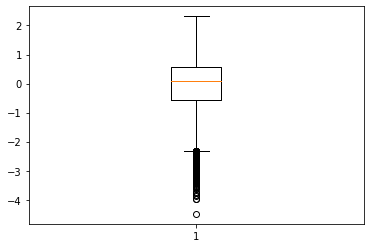

In [64]:
ind1=data['xG_diff']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['xG_diff'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdda5d760>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdda5de80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdda5d3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdda685e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdda68970>],
 'means': []}

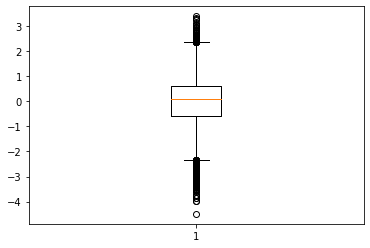

In [65]:
plt.boxplot(data['xGA_diff'])

In [66]:
Q1=np.percentile(data['xGA_diff'],25,interpolation='midpoint')
Q2=np.percentile(data['xGA_diff'],50,interpolation='midpoint')
Q3=np.percentile(data['xGA_diff'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['xGA_diff']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= -0.583812
Q2= 0.0882649999999999
Q3= 0.58692
IQR= 1.170732
low_lim= -2.33991
up_lim= 2.3430180000000003


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd812310>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd812a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd802f40>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd81e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd81e520>],
 'means': []}

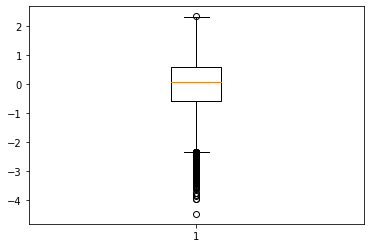

In [67]:
ind1=data['xGA_diff']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['xGA_diff'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd879340>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd879a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd869f70>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd8851c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd885550>],
 'means': []}

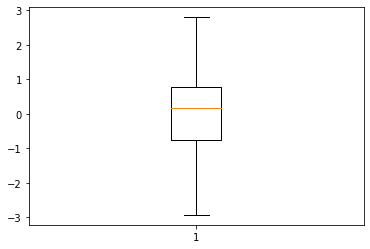

In [68]:
plt.boxplot(data['xpts_diff'])

In [69]:
Q1=np.percentile(data['xpts_diff'],25,interpolation='midpoint')
Q2=np.percentile(data['xpts_diff'],50,interpolation='midpoint')
Q3=np.percentile(data['xpts_diff'],75,interpolation='midpoint')
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
outlier=[]
for x in data['xpts_diff']:
    if((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= -0.7545
Q2= 0.16344999999999998
Q3= 0.79195
IQR= 1.54645
low_lim= -3.0741750000000003
up_lim= 3.111625


{'whiskers': [<matplotlib.lines.Line2D at 0x23cdd8e1940>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdd8ee0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdd8e15b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cdd8ee7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cdd8eeb50>],
 'means': []}

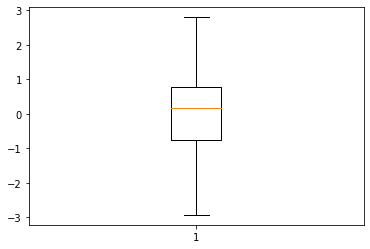

In [70]:
ind1=data['xpts_diff']>up_lim
ind=data.loc[ind1].index
data.drop(ind,inplace=True)
plt.boxplot(data['xpts_diff'])

In [71]:
data.shape

(19220, 29)

In [72]:
# No outliers for year,xpts,wins,draws,loses,pts

In [73]:
#3.Encoding
#Applying Label Encoding for the categorical features which are ordinal

In [74]:
X= data
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in X.select_dtypes(include=['object']):
    X[i]=label_en.fit_transform(X[i])

In [75]:
#4. Feature Engineering

In [76]:
#Expected goals for [xG] and goals against [xGA] can be combined to make a single column 'xG_minus_xGA' because that is what finally decides win or loss.
#So we can drop those 2 columns.
X['xG_minus_xGA'] = X['xG']-X['xGA']
X = X.drop(['xG'],axis=1)
X = X.drop(['xGA'],axis=1)
#Similarly for non-penalty xG and xGA.
X['npxG_minus_npxGA'] = X['npxG']-X['npxGA']
X = X.drop(['npxG'],axis=1)
X = X.drop(['npxGA'],axis=1)

#'scored' and 'missed' corresponds to the final score  
#so can combine them
X['final_score'] = X['scored']-X['missed']
X=X.drop(['scored','missed'],axis=1)

#'xG_diff' and 'xGA_diff' are nothing but (xG - scored) and (xGA - missed). So they can be dropped.
X = X.drop(['xG_diff','xGA_diff'],axis=1)

# information about game result is in 6 columns 'pts', 'final_score', wins', 'loses', 'draws' and 'result'. 
#Out of this, we need only 'pts'. So we can drop remaining.
X = X.drop(['final_score','wins','loses','draws','result'],axis=1)

In [77]:
#5.Feature Reduction

<AxesSubplot:>

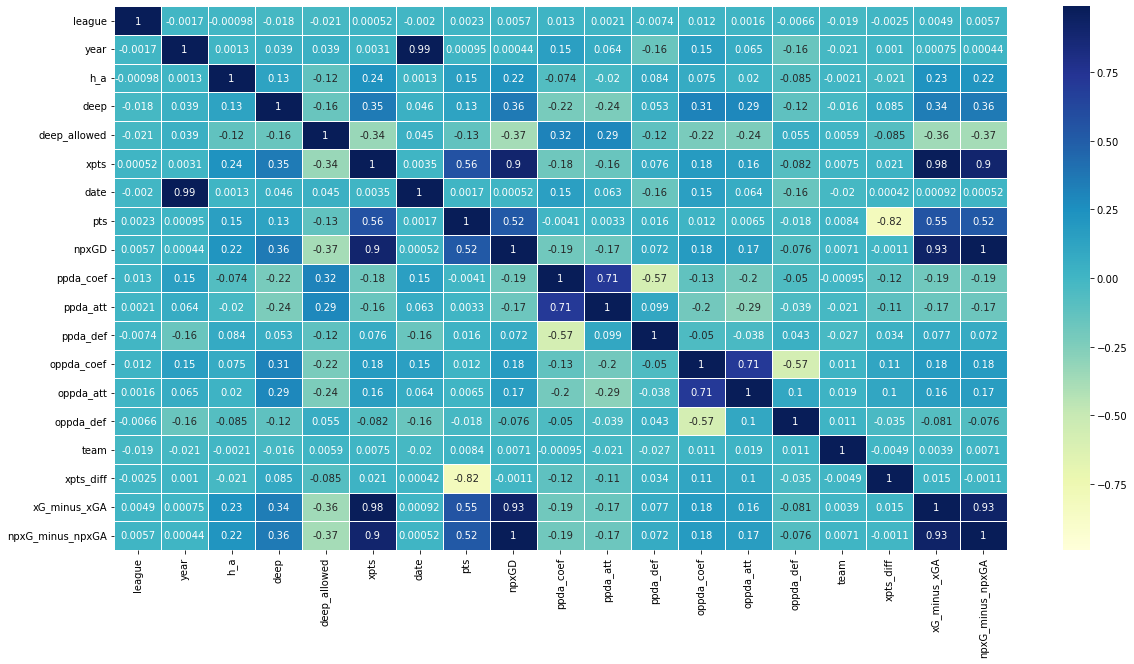

In [78]:
corrmatrix=X.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.99,vmax=0.99,annot=True,linewidth=0.9,cmap='YlGnBu')

In [79]:
X=X.drop(['date','npxGD','xpts','xpts_diff'],axis=1)

In [80]:
#'date' is highly positively correlated with year. So dropping 'date'
#'npxGD' is highly positively correlated with 'npxG_minus_npxGA'. So dropping 'npxGD'.
#'xpts' is highly positively correlated with 'xG_minus_xGA'. So dropping 'xpts'.
#'xpts_diff' is highly negatively correlated with 'pts'. So dropping 'xpts_diff'.

<AxesSubplot:>

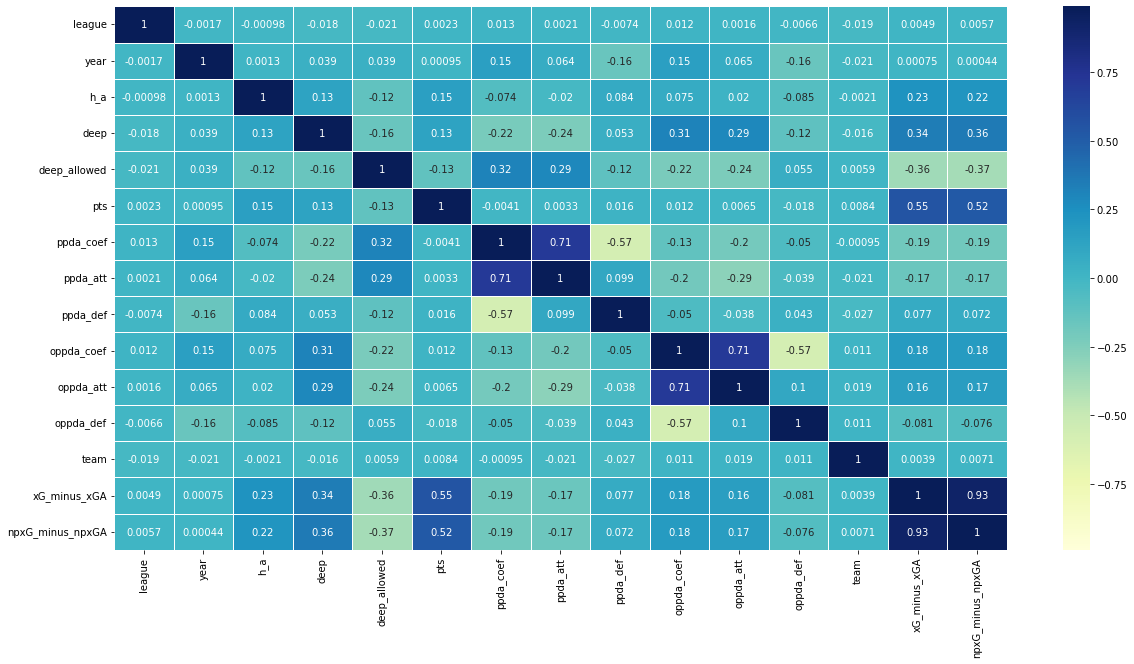

In [81]:
#Checking correlation again
corrmatrix=X.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.99,vmax=0.99,annot=True,linewidth=0.9,cmap='YlGnBu')

In [82]:
X.shape

(19220, 15)

In [83]:
#6.Standardization/normalization

array([[<AxesSubplot:title={'center':'league'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'h_a'}>,
        <AxesSubplot:title={'center':'deep'}>],
       [<AxesSubplot:title={'center':'deep_allowed'}>,
        <AxesSubplot:title={'center':'pts'}>,
        <AxesSubplot:title={'center':'ppda_coef'}>,
        <AxesSubplot:title={'center':'ppda_att'}>],
       [<AxesSubplot:title={'center':'ppda_def'}>,
        <AxesSubplot:title={'center':'oppda_coef'}>,
        <AxesSubplot:title={'center':'oppda_att'}>,
        <AxesSubplot:title={'center':'oppda_def'}>],
       [<AxesSubplot:title={'center':'team'}>,
        <AxesSubplot:title={'center':'xG_minus_xGA'}>,
        <AxesSubplot:title={'center':'npxG_minus_npxGA'}>,
        <AxesSubplot:>]], dtype=object)

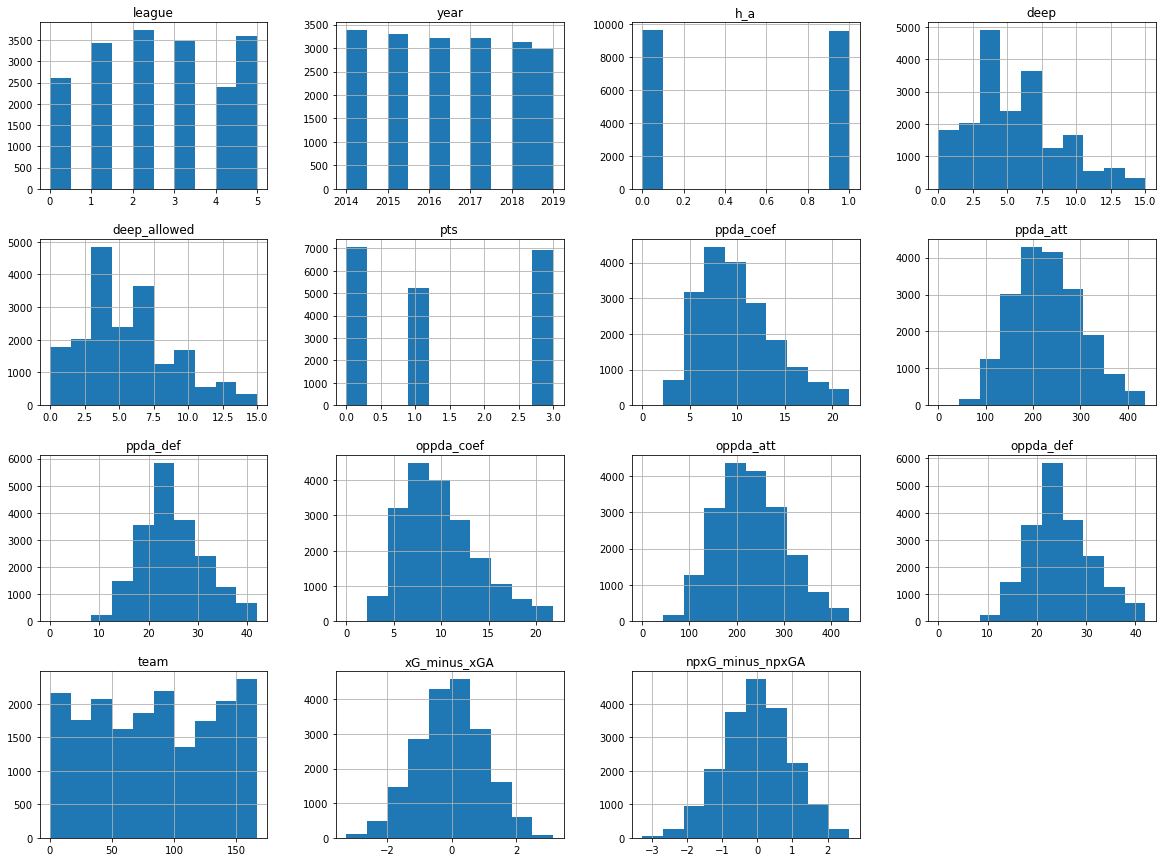

In [84]:
freqgraph=X.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))

In [85]:
from sklearn import preprocessing
transform_list = ['ppda_coef','ppda_att','ppda_def','oppda_coef','oppda_att','oppda_def','xG_minus_xGA','npxG_minus_npxGA']
standardisation = preprocessing.StandardScaler()
scaled_op = standardisation.fit_transform(X[transform_list])
for i in range(len(transform_list)):
    X[transform_list[i]] = scaled_op[:,i]
X.head()    

,league,year,h_a,deep,deep_allowed,pts,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_minus_xGA,npxG_minus_npxGA
1,0,2014,0,10.0,1.0,1,-1.318407,-0.509036,2.537191,1.951008,2.414975,-0.266473,16,0.209287,0.228419
9,1,2014,1,11.0,3.0,3,-0.956322,-0.550315,0.981501,0.867205,2.346139,0.821744,16,1.656999,1.010574
11,0,2014,1,12.0,6.0,3,-1.035303,-1.169487,0.048087,-0.242925,1.520107,2.065422,16,0.700774,0.762963
13,0,2014,1,3.0,1.0,3,-0.707384,-1.018134,-0.418620,0.443021,1.974425,1.132664,16,0.558266,0.607971
16,0,2014,0,7.0,1.0,3,-1.455832,-0.990615,2.070484,2.257161,2.538880,-0.421933,16,0.349433,0.380843


In [86]:
#Normalized all the variables which are normally distributed.

# 3.Exploratory Data Analysis

In [87]:
#1.Univariate Analysis
#Frequencyplot 

array([[<AxesSubplot:title={'center':'league'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'h_a'}>,
        <AxesSubplot:title={'center':'deep'}>],
       [<AxesSubplot:title={'center':'deep_allowed'}>,
        <AxesSubplot:title={'center':'pts'}>,
        <AxesSubplot:title={'center':'ppda_coef'}>,
        <AxesSubplot:title={'center':'ppda_att'}>],
       [<AxesSubplot:title={'center':'ppda_def'}>,
        <AxesSubplot:title={'center':'oppda_coef'}>,
        <AxesSubplot:title={'center':'oppda_att'}>,
        <AxesSubplot:title={'center':'oppda_def'}>],
       [<AxesSubplot:title={'center':'team'}>,
        <AxesSubplot:title={'center':'xG_minus_xGA'}>,
        <AxesSubplot:title={'center':'npxG_minus_npxGA'}>,
        <AxesSubplot:>]], dtype=object)

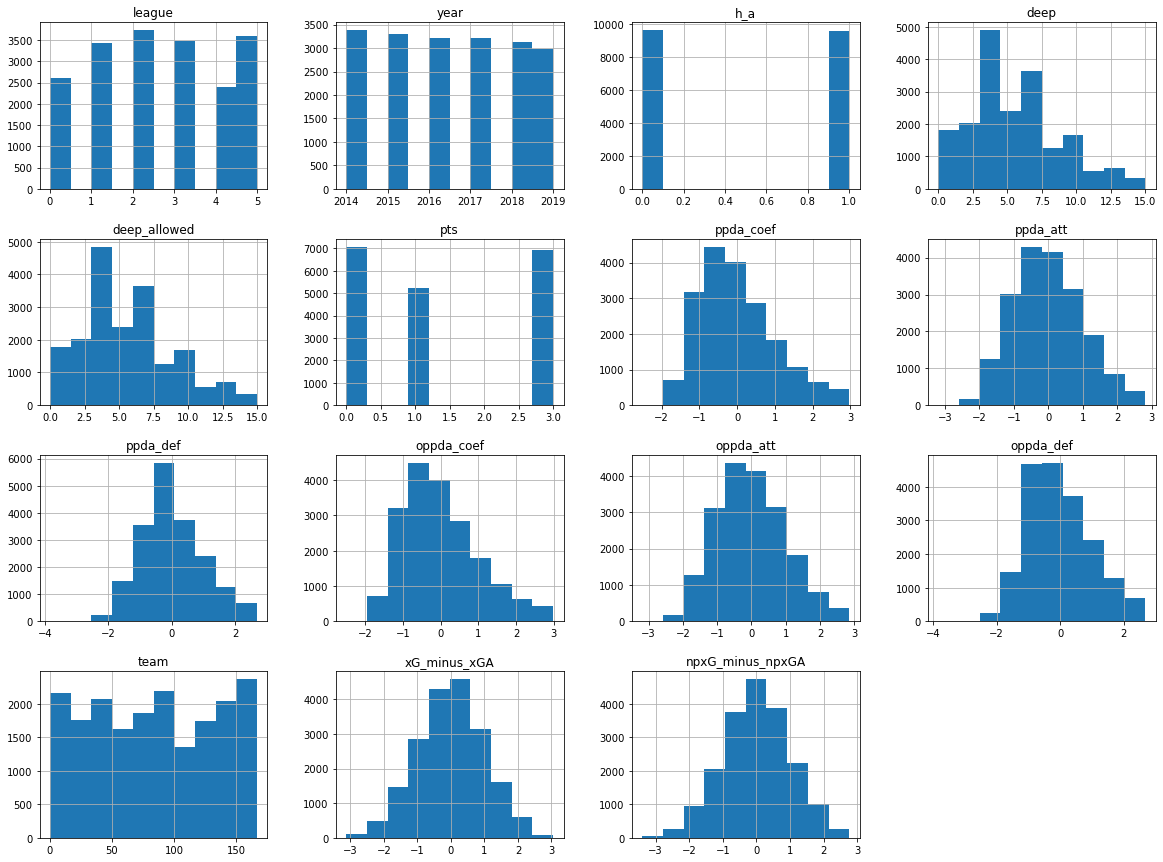

In [88]:
#Frequencygraph
freqgraph=X.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))

In [89]:
#2.Bivariate Analysis
#Pairplot and heatmap

In [90]:
#Pairplot

In [91]:
X.columns

Index(['league', 'year', 'h_a', 'deep', 'deep_allowed', 'pts', 'ppda_coef',
       'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team',
       'xG_minus_xGA', 'npxG_minus_npxGA'],
      dtype='object')

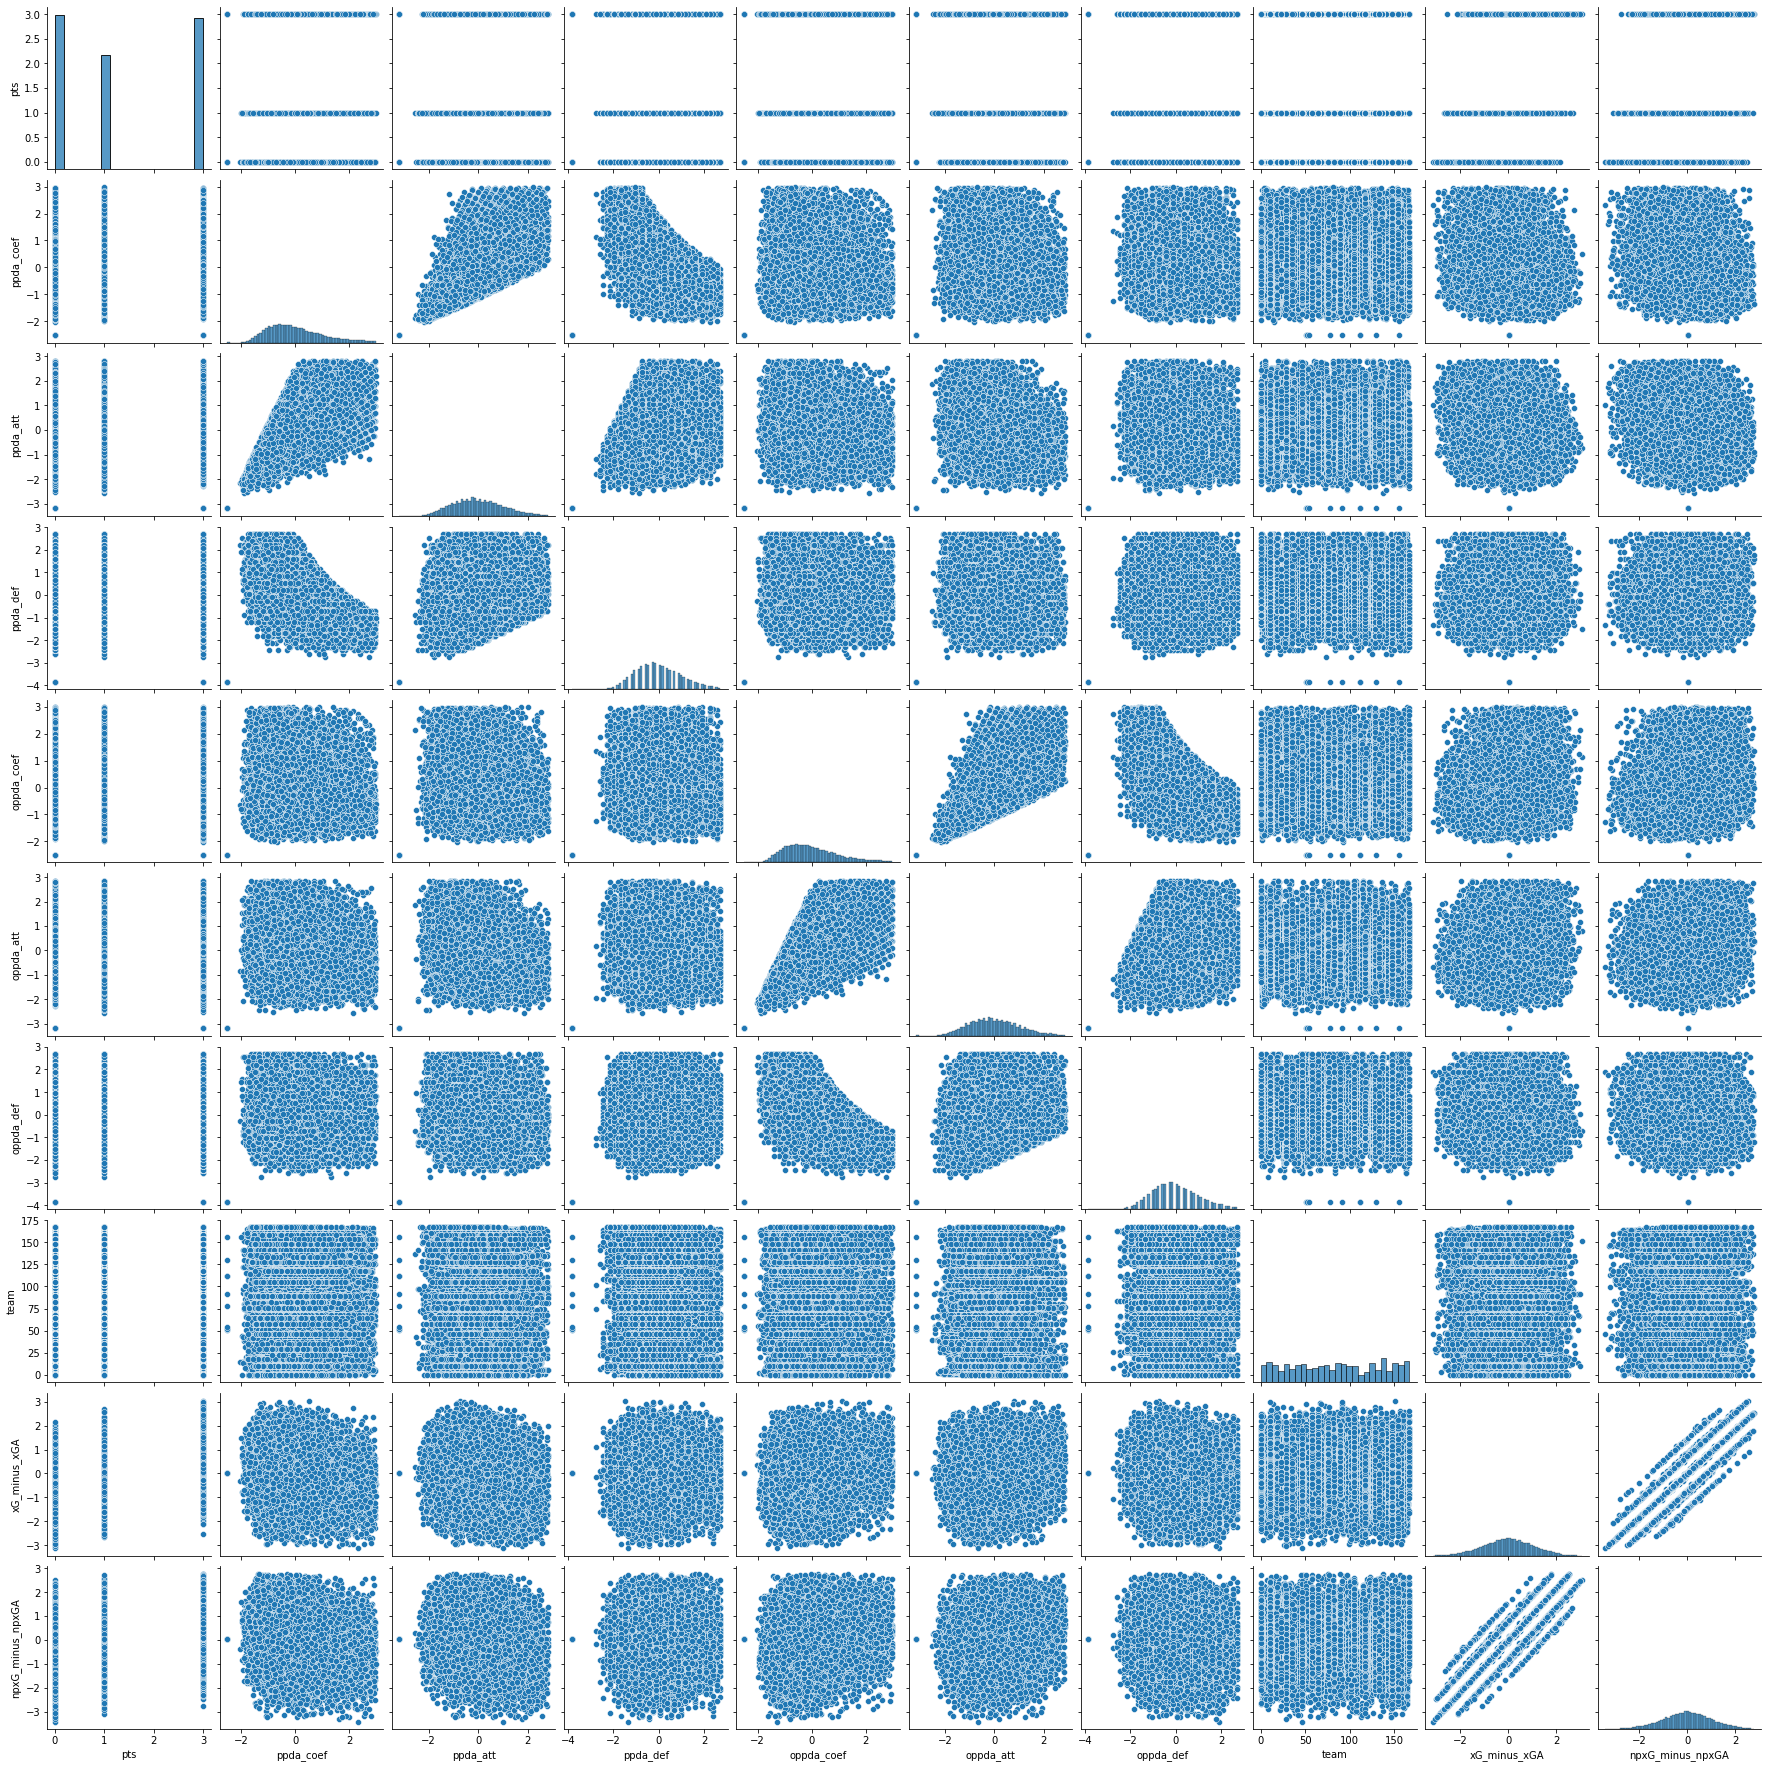

In [92]:
sns.pairplot(X[['pts','ppda_coef',
       'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team',
       'xG_minus_xGA', 'npxG_minus_npxGA']])
plt.show()

Text(0, 0.5, 'npxG_minus_npxGA')

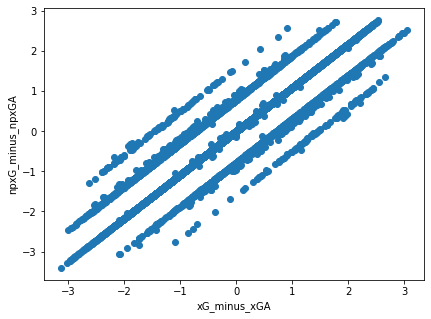

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X['xG_minus_xGA'],X['npxG_minus_npxGA'])
plt.xlabel('xG_minus_xGA')
plt.ylabel('npxG_minus_npxGA')

In [94]:
#Insight: From the pairplot 'xG_minus_xGA', and 'npxG_minus_npxGA' shows high linear correlation.

In [95]:
#Heatmap

<AxesSubplot:>

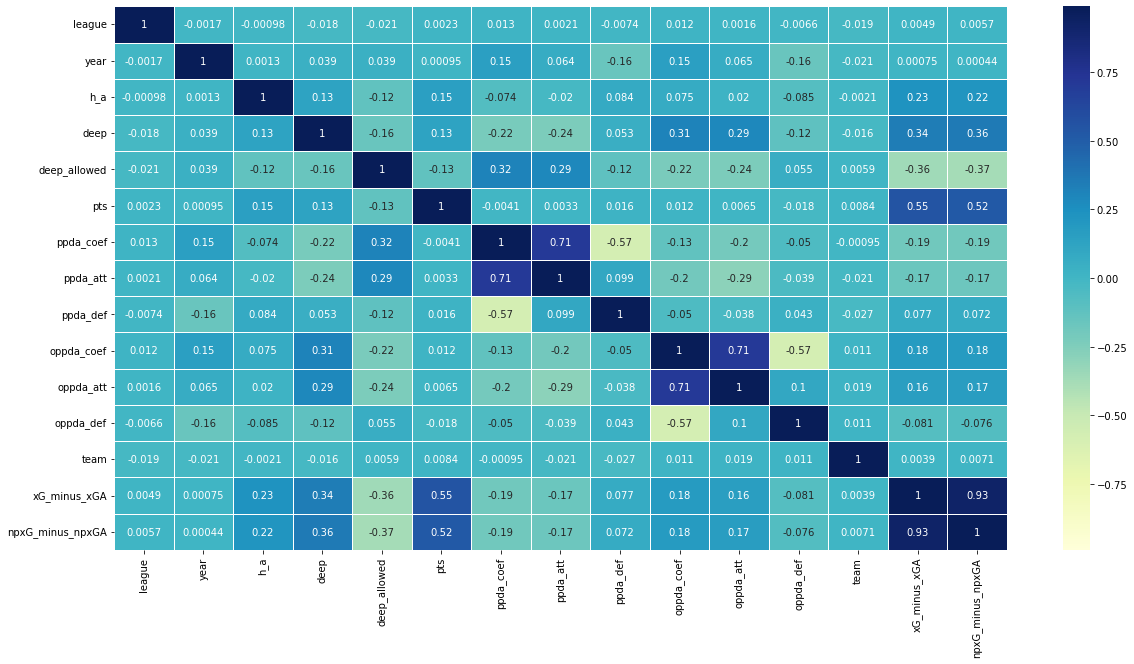

In [96]:
corrmatrix=X.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.99,vmax=0.99,annot=True,linewidth=0.9,cmap='YlGnBu')

In [97]:
#Insights:
#'ppda_att' is highly positively correlated with ppda_coeff. 
#'oppda_att' is highly positively correlated with 'oppda_coeff'
#'xG_minus_xGA' is highly positively correlated with 'npxG_minus_npxGA'
#'ppda_coef' is highly negatively correlated with 'ppda_def'
#'oppda_coeff' is highly negatively correlated with 'oppda_def'

In [98]:
#4.Modelling

In [99]:
X.head()

,league,year,h_a,deep,deep_allowed,pts,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_minus_xGA,npxG_minus_npxGA
1,0,2014,0,10.0,1.0,1,-1.318407,-0.509036,2.537191,1.951008,2.414975,-0.266473,16,0.209287,0.228419
9,1,2014,1,11.0,3.0,3,-0.956322,-0.550315,0.981501,0.867205,2.346139,0.821744,16,1.656999,1.010574
11,0,2014,1,12.0,6.0,3,-1.035303,-1.169487,0.048087,-0.242925,1.520107,2.065422,16,0.700774,0.762963
13,0,2014,1,3.0,1.0,3,-0.707384,-1.018134,-0.418620,0.443021,1.974425,1.132664,16,0.558266,0.607971
16,0,2014,0,7.0,1.0,3,-1.455832,-0.990615,2.070484,2.257161,2.538880,-0.421933,16,0.349433,0.380843


In [100]:
X.shape

(19220, 15)

In [101]:
#splitting the dataset into target and feature

In [102]:
y=X['pts']
X=X.drop(['pts'],axis=1)
results_arr = {'Accuracy':[],'MSE':[]}

In [103]:
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [104]:
#Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.5793964620187305
MSE is 1.8601456815816857
[[1308  136  301]
 [ 546  181  591]
 [ 279  168 1295]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
#Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.4701352757544225
MSE is 2.252445369406868
[[962 450 333]
 [457 390 471]
 [339 496 907]]


In [108]:
#KNN

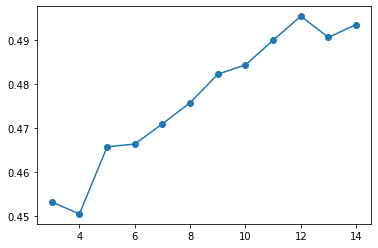

In [109]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')

In [110]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.4953173777315297
MSE is 2.3186264308012485
[[1158  261  326]
 [ 587  278  453]
 [ 471  327  944]]


In [111]:
#SVM

In [112]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.591675338189386
MSE is 1.8278876170655567
[[1368   77  300]
 [ 598  137  583]
 [ 292  112 1338]]


In [113]:
#Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.576690946930281
MSE is 1.7488033298647243
[[1265  233  247]
 [ 538  257  523]
 [ 269  224 1249]]


In [115]:
print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format('Item','LR', 'KNN','DT', 'SVM','RF'))
print('-'*80) 
# print each data item.
for key, value in results_arr.items():
    a1, a2, a3, a4, a5 = value
    a1 = np.round(a1,3)
    a2 = np.round(a2,3)
    a3 = np.round(a3,3)
    a4 = np.round(a4,3)
    a5 = np.round(a5,3)
    print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format(key, a1, a2, a3, a4, a5))

Item         | LR           | KNN          | DT           | SVM          | RF          
--------------------------------------------------------------------------------
Accuracy     | 0.579        | 0.47         | 0.495        | 0.592        | 0.577       
MSE          | 1.86         | 2.252        | 2.319        | 1.828        | 1.749       


In [116]:
# RF has given us lowest MSE. So, we have decided to go ahead with RF.

# 5.Model fine tuning

In [117]:

#From the comparison of various regressor models used for the study, the model with low MSE Value is taken for fine tuning. i.e, the RF Regressor is choosen for this.

In [118]:
rf = RandomForestClassifier(n_estimators=500,max_depth=50,random_state=42,criterion='entropy')
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

Accuracy is 0.5816857440166493
MSE is 1.7452653485952134
[[1301  187  257]
 [ 551  222  545]
 [ 255  215 1272]]


In [119]:
#MSE reduced to 1.745 from 1.762